# Practical Application III: Comparing Classifiers -- #1

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**The data collected information about 17 campaigns.**

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import roc_curve

from sklearn.metrics import accuracy_score, precision_score,recall_score, classification_report, mean_squared_error, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  Int64  
 1   job             41188 non-null  string 
 2   marital         41188 non-null  string 
 3   education       41188 non-null  string 
 4   default         41188 non-null  string 
 5   housing         41188 non-null  string 
 6   loan            41188 non-null  string 
 7   contact         41188 non-null  string 
 8   month           41188 non-null  string 
 9   day_of_week     41188 non-null  string 
 10  duration        41188 non-null  Int64  
 11  campaign        41188 non-null  Int64  
 12  pdays           41188 non-null  Int64  
 13  previous        41188 non-null  Int64  
 14  poutcome        41188 non-null  string 
 15  emp.var.rate    41188 non-null  Float64
 16  cons.price.idx  41188 non-null  Float64
 17  cons.conf.idx   41188 non-null 

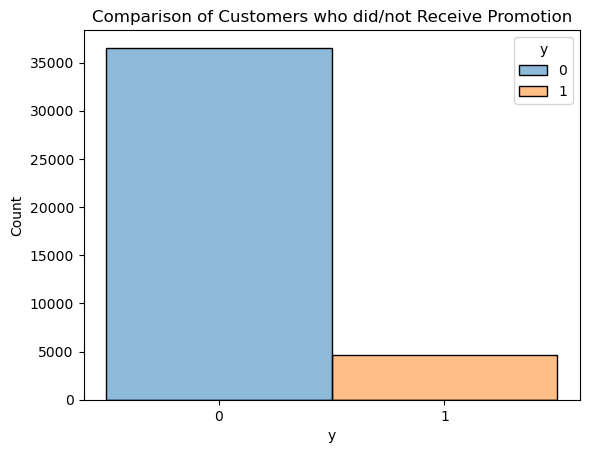

In [157]:
sns.histplot(data=df, x='y', hue='y').set(title='Comparison of Customers who did/not Receive Promotion')
plt.savefig("images/customer_comparison.jpg", bbox_inches='tight')

In [164]:
df.y.value_counts(normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: Float64

In [5]:
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  Int64  
 1   job             41188 non-null  string 
 2   marital         41188 non-null  string 
 3   education       41188 non-null  string 
 4   default         41188 non-null  string 
 5   housing         41188 non-null  string 
 6   loan            41188 non-null  string 
 7   contact         41188 non-null  string 
 8   month           41188 non-null  string 
 9   day_of_week     41188 non-null  string 
 10  duration        41188 non-null  Int64  
 11  campaign        41188 non-null  Int64  
 12  pdays           41188 non-null  Int64  
 13  previous        41188 non-null  Int64  
 14  poutcome        41188 non-null  string 
 15  emp.var.rate    41188 non-null  Float64
 16  cons.price.idx  41188 non-null  Float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Task: to increase the efficiency of bank's direct campaigns (phone, web) for long-term deposit subscriptions & reduce the number of contact.**

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [51]:
df_7 = df.iloc[:, :7]
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  Int64 
 1   job        41188 non-null  string
 2   marital    41188 non-null  string
 3   education  41188 non-null  string
 4   default    41188 non-null  string
 5   housing    41188 non-null  string
 6   loan       41188 non-null  string
dtypes: Int64(1), string(6)
memory usage: 2.2 MB


In [52]:
# not binary
one_hot_encoded_job = pd.get_dummies(df_7['job'], prefix='job')
one_hot_encoded_marital = pd.get_dummies(df_7['marital'], prefix='marital')
one_hot_encoded_education = pd.get_dummies(df_7['education'], prefix='education')

df_7 = pd.concat([df_7, one_hot_encoded_job], axis=1)
df_7 = pd.concat([df_7, one_hot_encoded_marital], axis=1)
df_7 = pd.concat([df_7, one_hot_encoded_education], axis=1)

# binary
df_7.loc[df_7.default == 'no', 'default'] = '0'
df_7.loc[df_7.default == 'unknown', 'default'] = '-1'
df_7.loc[df_7.default == 'yes', 'default'] = '1'

df_7.loc[df_7.housing == 'no', 'housing'] = '0'
df_7.loc[df_7.housing == 'unknown', 'housing'] = '-1'
df_7.loc[df_7.housing == 'yes', 'housing'] = '1'

df_7.loc[df_7.loan == 'no', 'loan'] = '0'
df_7.loc[df_7.loan == 'unknown', 'loan'] = '-1'
df_7.loc[df_7.loan == 'yes', 'loan'] = '1'

y_column = df.iloc[:,-1:]
y_column.loc[y_column.y == 'no', 'y'] = '0'

df_7.default = pd.to_numeric(df_7['default'])
df_7.housing = pd.to_numeric(df_7['housing'])
df_7.loan = pd.to_numeric(df_7['loan'])


df_7.drop(columns=['job','marital','education'], inplace=True)

df_7 = pd.concat([df_7, y_column], axis=1)
df_7.head()

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,y
0,56,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,57,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,37,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,40,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,56,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [166]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            41188 non-null  Int64 
 1   default                        41188 non-null  int64 
 2   housing                        41188 non-null  int64 
 3   loan                           41188 non-null  int64 
 4   job_admin.                     41188 non-null  uint8 
 5   job_blue-collar                41188 non-null  uint8 
 6   job_entrepreneur               41188 non-null  uint8 
 7   job_housemaid                  41188 non-null  uint8 
 8   job_management                 41188 non-null  uint8 
 9   job_retired                    41188 non-null  uint8 
 10  job_self-employed              41188 non-null  uint8 
 11  job_services                   41188 non-null  uint8 
 12  job_student                    41188 non-null  uint8 
 13  j

In [83]:
# df_7[df_7.columns[df_7.isna().any()]]

In [54]:
# Create a backup of the DataFrame & save to a .csv file
df_7_BACK = df_7.copy()

df.to_csv('data/df_7.csv', sep=',', encoding='utf-8')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [86]:
X = df_7.drop(columns=['y']) # 41188, 28
y = df_7['y'] # 41188, 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = df_7.y)

In [89]:
y_train.value_counts(normalize = True)

0    0.887335
1    0.112665
Name: y, dtype: Float64

In [88]:
y_test.value_counts(normalize = True)

0    0.887368
1    0.112632
Name: y, dtype: Float64

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [128]:
baseline = round(y_test.value_counts(normalize = True)[0] * 100)
print(f'Baseline: {baseline}')

Baseline: 89


In [93]:
def get_score_dict(y_test, y_pred, pos_label):
    scoring_dict = {}
    scoring_dict['accuracy'] = accuracy_score(y_test, y_pred)
    scoring_dict['precision'] = precision_score(y_test, y_pred, pos_label=pos_label)
    scoring_dict['recall'] = recall_score(y_test, y_pred, pos_label=pos_label)
    scoring_dict['f1'] = f1_score(y_test, y_pred, pos_label=pos_label)
    return scoring_dict

In [95]:
dummy_clf = DummyClassifier().fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)
scoring_dummy_dict = get_score_dict(y_test, y_pred, '0')

print('--------- DummyClassifier -----------')
print(scoring_dummy_dict)

--------- DummyClassifier -----------
{'accuracy': 0.8873684984918708, 'precision': 0.8873684984918708, 'recall': 1.0, 'f1': 0.9403235236795946}


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [96]:
lr = LogisticRegression().fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [98]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
scoring_lr_dict = get_score_dict(y_test, y_pred, '0')

print('--------- LogisticRegression -----------')
print(scoring_dict)

--------- LogisticRegression -----------
{'accuracy': 0.8873684984918708, 'precision': 0.8873684984918708, 'recall': 1.0, 'f1': 0.9403235236795946}


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [99]:
# scale test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
lr = LogisticRegression()

lr_fit_start = time.time()
lr.fit(X_train, y_train)
lr_fit_time = time.time() - lr_fit_start

lr_cv_results = cross_validate(lr, X, y, return_train_score=True, cv=5)
lr_train_acc = lr_cv_results['train_score'].mean()

lr_y_pred = lr.predict(X_test)
lr_test_acc = accuracy_score(y_test, lr_y_pred)

print('----- LogisticRegression -----')
print('Train Time', lr_fit_time)
print('Train Accuracy', lr_train_acc)
print('Test Accuracy ', lr_test_acc)

----- LogisticRegression -----
Train Time 0.07238221168518066
Train Accuracy 0.8873276194491024
Test Accuracy  0.8873684984918708


In [101]:
knn = KNeighborsClassifier()

knn_fit_start = time.time()
knn.fit(X_train, y_train)
knn_fit_time = time.time() - knn_fit_start

knn_cv_results = cross_validate(knn, X, y, return_train_score=True, cv=5)
knn_train_acc = knn_cv_results['train_score'].mean()

knn_y_pred = knn.predict(X_test)
knn_test_acc = accuracy_score(y_test, knn_y_pred)

print('----- KNeighborsClassifier -----')
print('Train Time', knn_fit_time)
print('Train Accuracy', knn_train_acc)
print('Test Accuracy ', knn_test_acc)

----- KNeighborsClassifier -----
Train Time 0.026667118072509766
Train Accuracy 0.8941317876283768
Test Accuracy  0.8783197233870375


In [104]:
tree = DecisionTreeClassifier()

tree_fit_start = time.time()
tree.fit(X_train, y_train)
tree_fit_time = time.time() - tree_fit_start

tree_cv_results = cross_validate(tree, X, y, return_train_score=True, cv=5)
tree_train_acc = tree_cv_results['train_score'].mean()

tree_y_pred = tree.predict(X_test)
tree_test_acc = accuracy_score(y_test, tree_y_pred)

print('----- DecisionTreeClassifie -----')
print('Train Time', tree_fit_time)
print('Train Accuracy', tree_train_acc)
print('Test Accuracy ', tree_test_acc)

----- DecisionTreeClassifie -----
Train Time 0.08692669868469238
Train Accuracy 0.9174820332153658
Test Accuracy  0.8614728168910468


In [109]:
# 'probability=True' added to be able to print ROC
svc = SVC(probability=True)

svc_fit_start = time.time()
svc.fit(X_train, y_train)
svc_fit_time = time.time() - svc_fit_start

svc_cv_results = cross_validate(svc, X, y, return_train_score=True, cv=5)
svc_train_acc = svc_cv_results['train_score'].mean()

svc_y_pred = svc.predict(X_test)
svc_test_acc = accuracy_score(y_test, svc_y_pred)

print('----- SVC -----')
print('Train Time', svc_fit_time)
print('Train Accuracy', svc_train_acc)
print('Test Accuracy ', svc_test_acc)

----- SVC -----
Train Time 56.99686789512634
Train Accuracy 0.8876553794020449
Test Accuracy  0.8872213639373207


In [111]:
cols = ['Model','Train Time','Train Accuracy','Test Accuracy']

data= [
    ['LogisticRegression',lr_fit_time,lr_train_acc,lr_test_acc],
    ['KNeighborsClassifier',knn_fit_time,knn_train_acc,knn_test_acc],
    ['DecisionTreeClassifier',tree_fit_time,tree_train_acc,tree_test_acc],
    ['SVC', svc_fit_time, svc_train_acc, svc_test_acc]
]
default_comparo_df = pd.DataFrame(data, columns=cols)
default_comparo_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,LogisticRegression,0.072382,0.887328,0.887368
1,KNeighborsClassifier,0.026667,0.894132,0.878320
2,DecisionTreeClassifier,0.086927,0.917482,0.861473
3,SVC,56.996868,0.887655,0.887221


In [152]:
y_pred_prob1 = lr.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1, pos_label='1')

y_pred_prob2 = knn.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2, pos_label='1')

y_pred_prob3 = tree.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3, pos_label='1')

y_pred_prob4 = svc.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4, pos_label='1')

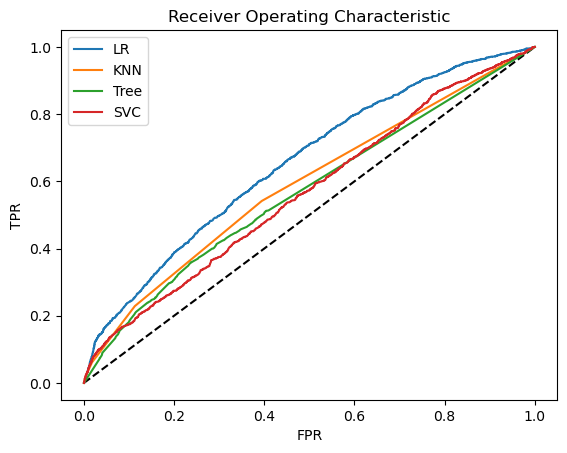

<Figure size 640x480 with 0 Axes>

In [153]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LR")
plt.plot(fpr2, tpr2, label= "KNN")
plt.plot(fpr3, tpr3, label= "Tree")
plt.plot(fpr4, tpr4, label= "SVC")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

plt.savefig("images/roc_untuned.jpg", bbox_inches='tight')

**More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?**

In [118]:
df_2 = df.copy()

In [119]:
col_uni_val={}
for i in df_2.columns:
    col_uni_val[i] = len(df_2[i].unique())
    
col_uni_val

{'age': 78,
 'job': 12,
 'marital': 4,
 'education': 8,
 'default': 3,
 'housing': 3,
 'loan': 3,
 'contact': 2,
 'month': 10,
 'day_of_week': 5,
 'duration': 1544,
 'campaign': 42,
 'pdays': 27,
 'previous': 8,
 'poutcome': 3,
 'emp.var.rate': 10,
 'cons.price.idx': 26,
 'cons.conf.idx': 26,
 'euribor3m': 316,
 'nr.employed': 11,
 'y': 2}

In [123]:
df_2.contact.value_counts().index

Index(['cellular', 'telephone'], dtype='string')

In [218]:
df_2.poutcome.value_counts() # outcome of the previous marketing campaign

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: Int64

In [220]:
df_2.default.value_counts() # has credit in default?

no         32588
unknown     8597
yes            3
Name: default, dtype: Int64

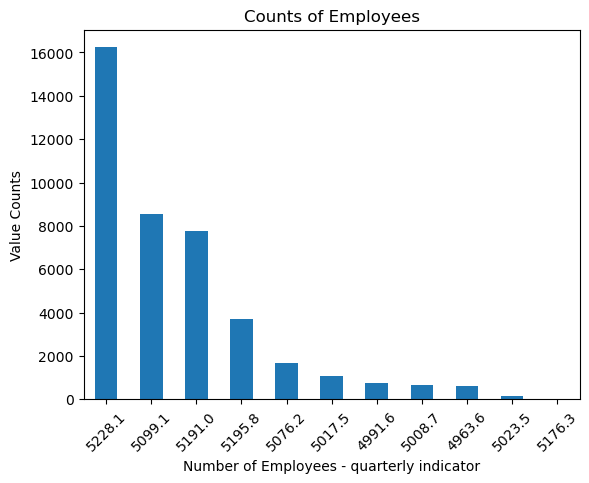

In [180]:
# vc_series = df_2['nr.employed'].value_counts() #number of employees
vc_series.values
vc_series.index
ax = vc_series.plot.bar(x=vc_series.index, y=vc_series.values, rot=45)
ax.set_title("Counts of Employees")
ax.set_xlabel("Number of Employees - quarterly indicator")
ax.set_ylabel("Value Counts")
ax.get_figure().savefig("images/num_employees_value_counts.jpg", bbox_inches='tight')

In [173]:
df_2.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: Int64

In [224]:
df_2.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: Int64

In [225]:
df_2.pdays.value_counts() # number of days that passed by after the client was last contacted from a previous campaign
# 999 means never contacted

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: Int64

'gender feature' does not exist in this data set. However, having read the documentation, it was stated that
the ration of male:female was almost identical -> could be removed.

* contact

cellular     26144
telephone    15044

may not be that significant except to indicate that the customers tend to use their cell phones more than their
land lines. This could suggest that if the bank has both numbers for a (potential) customer, using their cell
to contact them would be a better choice.

* poutcome

nonexistent    35563
failure         4252
success         1373

Suggests that the campaigns have not been very facorable. However, 'nonexistent' suggests that either good record-
keeping is not in place & should be improved and/or that these are potential clients who have not been contacted
and need reaching out to.

* default (defaulted on a loan)

no         32588
unknown     8597
yes            3

Is a crucial metric. Only 3 have but there are ~8.5K where this information is unknown. Perhaps before putting
in the effort of contacting them (assuming that they have not and 'default' is a deal-breaker for the bank),
it would be helpful to get this information before making efforts to contact the clients.

* loan

no         33950
yes         6248
unknown      990

Probably one of the most important factors to consider. Why do most customers not have a loan (what factors play
into this? Do they have bad credit, defaulted on a loan, etc.) or have they not been contacted yet? If the later,
and all bank rubrics are met, these customers should be focused on.